# Regularization:

**GOAL**: Reduce complexity of your model. AKA Prevent Overfitting. AKA Reduce Variance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

Let's try to create some data that roughly follows this equation:


$$ y = \sqrt x $$


Add in some normally-distributed noise to make it a bit more interesting.

In [2]:
X = np.arange(0, 100, 5)
y = [np.sqrt(x_val) + np.random.normal(0, 0.7) for x_val in X]

In [3]:
X, y

(array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95]),
 [-0.9582567479432886,
  2.41817894723883,
  3.4474868004508323,
  4.207521704027274,
  4.495685591437781,
  4.94319753348939,
  5.262276965794781,
  6.369672994409645,
  6.62883602319833,
  7.515871379434779,
  7.290256950161877,
  7.612461550928652,
  7.750286731856298,
  9.834784709927412,
  7.491245646859065,
  10.31640162393367,
  10.75657117824132,
  8.110740100013274,
  8.723666443428248,
  9.866429285317398])

### Always SCALE THE DATA for Regularization

In [4]:
#scaler = StandardScaler()

In [5]:
#X = scaler.fit(X.reshape(-1,1))
#X

### Now let's intentionally overfit a model that focuses too much on training examples.

In [8]:
#Create more features to create a model that is too complex
poly = PolynomialFeatures(degree=12, include_bias=False) 
X = X.reshape(-1,1)
X_poly = poly.fit_transform(X)

In [9]:
X_poly.shape

(20, 12)

## Another extreme case:
- Generate similar data but purposely throw in some outliers.

In [10]:
X = np.linspace(0, 15, 15).reshape(-1, 1)
y = [np.sqrt(x_val) + np.random.normal(0,0.1) for x_val in X]

#### And watch how the Linear Regression model overfits:

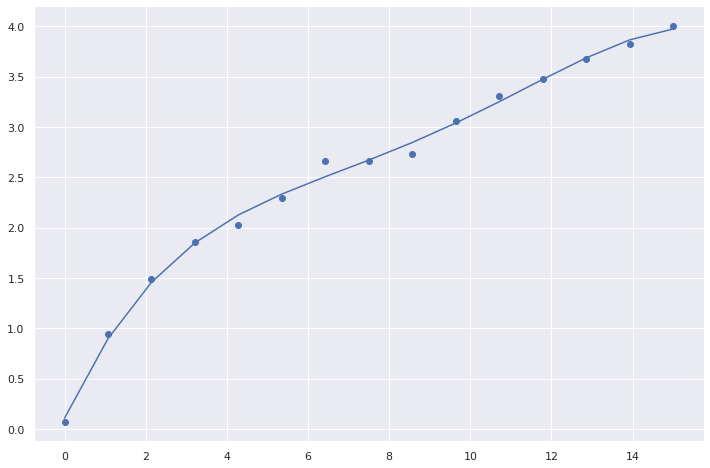

In [11]:
### Make model unnecessarily complex:
poly = PolynomialFeatures(degree=4, include_bias=False )
X_poly = poly.fit_transform(X)

##Fit Linear Regression
m = LinearRegression() 
m.fit(X_poly, y)  
ypred = m.predict(X_poly)

## Plot
plt.figure(figsize=(12, 8))
plt.scatter(X, y)
plt.plot(X, ypred)

## We can reduce this complexity through Regularization

There are three models that we can use for this purpose: 
- Ridge
- Lasso 
- ElasticNet  


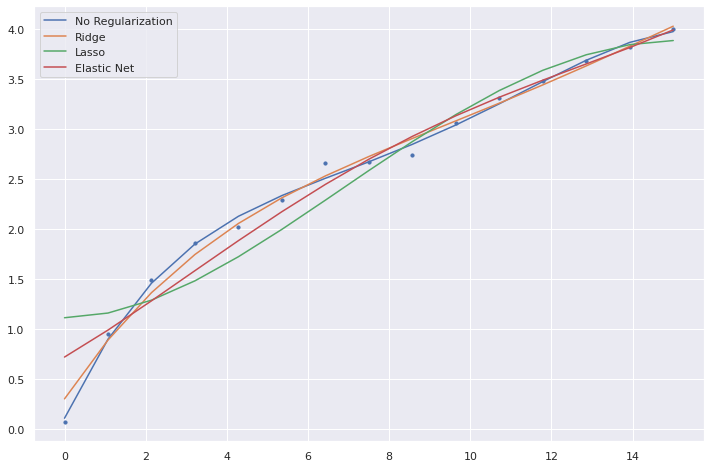

In [12]:
m = LinearRegression() 
m_ridge = Ridge(alpha=0.5) 
m_lasso = Lasso(alpha=0.5)
m_elastic = ElasticNet(alpha=0.3, l1_ratio=0.2) # l1 is for lasso, alpha is for ridge

m.fit(X_poly, y)       
m_ridge.fit(X_poly, y)  
m_lasso.fit(X_poly, y)  
m_elastic.fit(X_poly, y)  

ypred = m.predict(X_poly)
ypred_ridge = m_ridge.predict(X_poly)
ypred_lasso = m_lasso.predict(X_poly)
ypred_elastic = m_elastic.predict(X_poly)

plt.figure(figsize=(12, 8))
plt.scatter(X, y, s=10)
plt.plot(X, ypred, label='No Regularization')
plt.plot(X, ypred_ridge, label='Ridge')
plt.plot(X, ypred_lasso, label='Lasso')
plt.plot(X, ypred_elastic, label ='Elastic Net')
plt.legend()

**Inspect Coefficients**

In [13]:
m.coef_

array([[ 8.66258955e-01, -1.30954417e-01,  1.02487748e-02,
        -2.81543159e-04]])

In [14]:
m_ridge.coef_

array([[ 6.09864142e-01, -6.06207874e-02,  3.53405979e-03,
        -7.32784081e-05]])

In [15]:
m_lasso.coef_

array([ 0.00000000e+00,  4.36490035e-02, -2.57210846e-03,  3.22250867e-05])

Good visual explanation of why Ridge doesn't shrink coefficients to 0, but Lasso does: 
https://www.youtube.com/watch?v=Xm2C_gTAl8c